In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
d1 = pd.read_csv("Crime rate.csv")
d1.at[18,"neighborhood"] = "Central Business District"
d1

,neighborhood,number_major_crimes_1973,neighborhood_crime_rate_1973,number_major_crimes_1974,neighborhood_crime_rate_1974,number_major_crimes_1975,neighborhood_crime_rate_1975
0,Westwood,65,0.019,46,0.014,78,0.023
1,31st ward,125,0.017,85,0.012,92,0.013
2,Arlington,243,0.037,177,0.027,184,0.028
3,Allegheny Center,277,0.151,407,0.222,571,0.312
4,Allegheny West,154,0.147,197,0.188,227,0.217
...,...,...,...,...,...,...,...
64,Swisshelm Heights,18,0.009,14,0.007,16,0.008
65,Troy Hill,75,0.019,55,0.014,61,0.016
66,Uptown,323,0.099,382,0.117,409,0.126
67,West End,70,0.049,70,0.049,60,0.040


In [44]:
d1 = d1[["neighborhood","neighborhood_crime_rate_1975"]]
d1 = d1.rename(columns={"neighborhood_crime_rate_1975":"Crime Rate %","neighborhood":"Neighborhood"})
for index, row in d1.iterrows():
    percentage = row["Crime Rate %"]
    percentage = percentage * 100
    percentage = round(percentage,2)
    d1.at[index,"Crime Rate %"] = percentage


d1

,Neighborhood,Crime Rate %
0,Westwood,2.3
1,31st ward,1.3
2,Arlington,2.8
3,Allegheny Center,31.2
4,Allegheny West,21.7
...,...,...
64,Swisshelm Heights,0.8
65,Troy Hill,1.6
66,Uptown,12.6
67,West End,4.0


In [65]:
d1.nsmallest(20,"Crime Rate %")

,Neighborhood,Crime Rate %
31,Glen Hazel Heights,0.0
64,Swisshelm Heights,0.8
35,Ivory Avenue District,1.0
17,Crafton Heights,1.2
50,Oakwood,1.2
1,31st ward,1.3
11,Brighton Heights,1.5
59,Spring Hill,1.5
12,Brookline,1.6
51,Overbrook,1.6


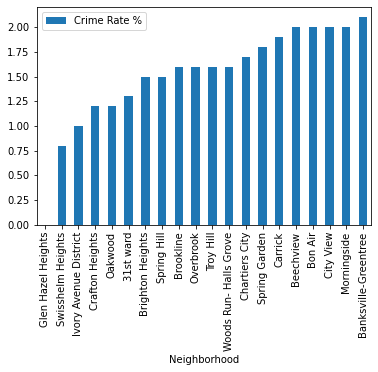

In [64]:
d1.nsmallest(20,"Crime Rate %").plot(x="Neighborhood", y ="Crime Rate %", kind = "bar")

In [52]:
d2 = pd.read_csv("Households neighborhoods.csv")
d2

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Family households:,Margin of Error; Family households:,Estimate; Family households: - Married-couple family,Margin of Error; Family households: - Married-couple family,Estimate; Family households: - Other family:,Margin of Error; Family households: - Other family:,Estimate; Family households: - Other family: - Male householder,Margin of Error; Family households: - Other family: - Male hous,Estimate; Family households: - Other family: - Female household,Margin of Error; Family households: - Other family: - Female ho,Estimate; Nonfamily households:,Margin of Error; Nonfamily households:,Estimate; Nonfamily households: - Householder living alone,Margin of Error; Nonfamily households: - Householder living alo,Estimate; Nonfamily households: - Householder not living alone,Margin of Error; Nonfamily households: - Householder not living
0,Allegheny Center,1,870.0,93.000000,184.0,59.000000,128.0,51.000000,56.0,35.000000,0.0,10.000000,56.0,35.000000,686.0,79.000000,529.0,81.000000,157.0,53.000000
1,Allegheny West,2,146.0,36.000000,70.0,32.000000,66.0,32.000000,4.0,7.000000,4.0,7.000000,0.0,10.000000,76.0,29.000000,61.0,25.000000,15.0,15.000000
2,Allentown,3,1069.0,132.457540,622.0,130.234404,175.0,63.584589,447.0,134.718224,16.0,23.685439,431.0,133.360414,447.0,106.386089,383.0,101.710373,64.0,50.249378
3,Arlington,4,701.0,104.465305,394.0,78.319857,230.0,59.514704,164.0,61.302528,44.0,31.764760,120.0,54.726593,307.0,78.568442,180.0,56.151581,127.0,55.668663
4,Arlington Heights,5,144.0,59.000000,86.0,62.000000,0.0,10.000000,86.0,62.000000,0.0,10.000000,86.0,62.000000,58.0,33.000000,58.0,33.000000,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,1287.0,137.091211,543.0,114.376571,334.0,99.644368,209.0,79.636675,90.0,53.600373,119.0,60.613530,744.0,142.147810,515.0,117.209215,229.0,101.444566
87,West End,88,99.0,47.000000,28.0,20.000000,19.0,16.000000,9.0,16.000000,0.0,10.000000,9.0,16.000000,71.0,44.000000,39.0,27.000000,32.0,43.000000
88,West Oakland,89,630.0,79.611557,261.0,60.901560,34.0,23.430749,227.0,56.435804,16.0,19.723083,211.0,55.569776,369.0,69.115845,261.0,66.211781,108.0,46.400431
89,Westwood,90,1492.0,112.538882,896.0,113.718952,673.0,115.663304,223.0,61.294372,70.0,38.483763,153.0,57.245087,596.0,111.731822,526.0,113.863954,70.0,40.496913


In [53]:
d2 = d2[["Neighborhood","Estimate; Family households:","Estimate; Nonfamily households:"]]
d2["Family households %"] = ""
for index, row in d2.iterrows():
    total = row["Estimate; Nonfamily households:"]+row["Estimate; Family households:"]
    families = row["Estimate; Family households:"]
    percentage1 = round((families/total*100),2)
    d2.at[index,'Family households %'] = percentage1

d2 = d2.drop(columns = ["Estimate; Family households:","Estimate; Nonfamily households:"])
d2["Family households %"] = d2["Family households %"].astype(float)
d2

<ipython-input-53-7e4950e9e7c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2["Family households %"] = ""


,Neighborhood,Family households %
0,Allegheny Center,21.15
1,Allegheny West,47.95
2,Allentown,58.19
3,Arlington,56.21
4,Arlington Heights,59.72
...,...,...
86,Upper Lawrenceville,42.19
87,West End,28.28
88,West Oakland,41.43
89,Westwood,60.05


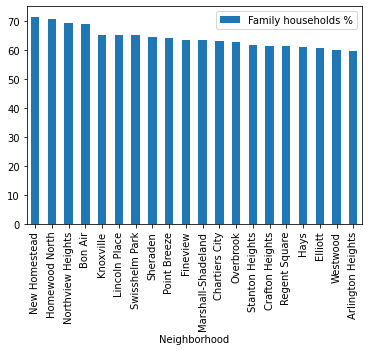

In [61]:
d2.nlargest(20,"Family households %").plot(x="Neighborhood", y ="Family households %", kind = "bar")